# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd

In [2]:
df_booking = pd.read_csv("d:\individual test\British Airways\customer_booking.csv", encoding="ISO-8859-1")
df_booking.head()

<>:1: SyntaxWarning: invalid escape sequence '\i'
<>:1: SyntaxWarning: invalid escape sequence '\i'
C:\Users\xuziw\AppData\Local\Temp\ipykernel_33128\2907043185.py:1: SyntaxWarning: invalid escape sequence '\i'
  df_booking = pd.read_csv("d:\individual test\British Airways\customer_booking.csv", encoding="ISO-8859-1")


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [3]:
df_booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
df_booking["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df_booking["flight_day"] = df_booking["flight_day"].map(mapping)

In [6]:
df_booking["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [7]:
df_booking.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

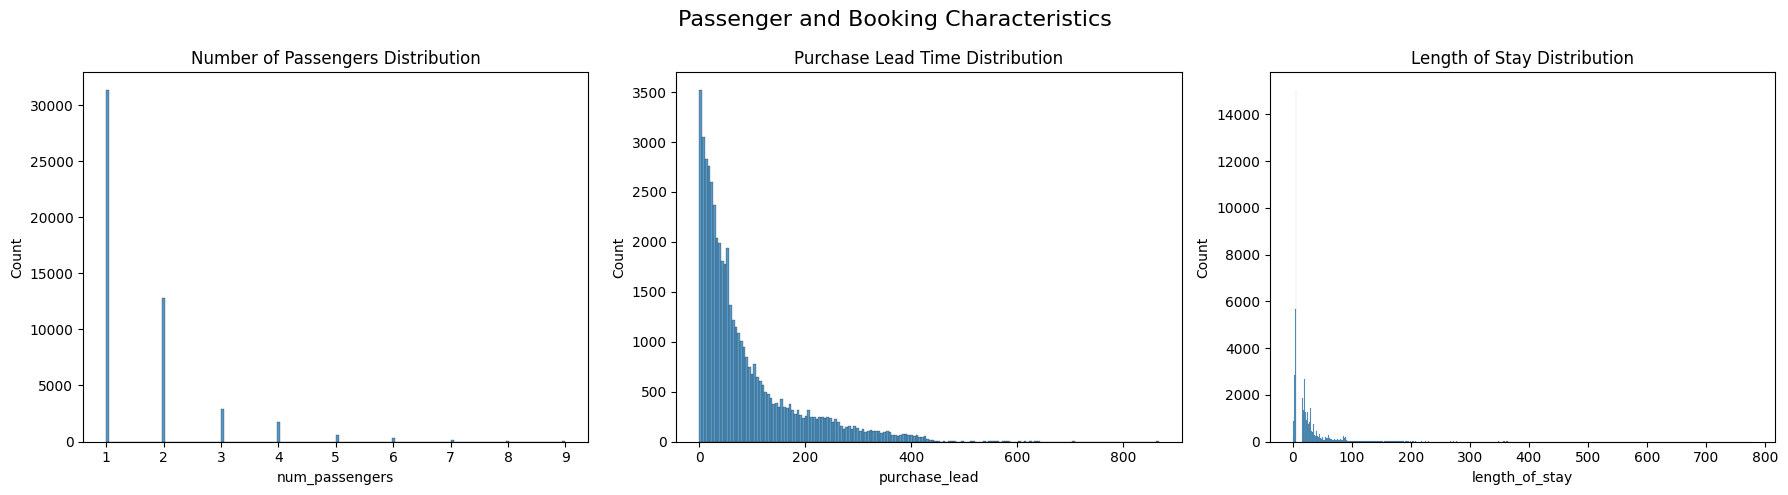

In [9]:
# Distribution of passenger and booking characteristics
passenger_cols = ['num_passengers', 'purchase_lead', 'length_of_stay']
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Passenger and Booking Characteristics', fontsize=16)

# Distribution of number of passengers
sns.histplot(data=df_booking, x='num_passengers', ax=axes[0])
axes[0].set_title('Number of Passengers Distribution')

# Distribution of lead time
sns.histplot(data=df_booking, x='purchase_lead', ax=axes[1])
axes[1].set_title('Purchase Lead Time Distribution')

# Length of stay
sns.histplot(data=df_booking, x='length_of_stay', ax=axes[2])
axes[2].set_title('Length of Stay Distribution')

plt.tight_layout()
plt.show()

**Number of Passengers Distribution.**
- The vast majority of bookings are made by singles, about 30,000 cases.
- Double bookings are the second most common, with about 12,000 cases.
- Group bookings of 3 or more people are relatively rare.
- The overall distribution is skewed to the right

**Purchase Lead Time Distribution.**
- Most bookings are concentrated in shorter lead times
- Typical long-tailed distribution
- Peak bookings occur very close to the arrival date
- The number of bookings drops sharply as the lead time increases

**Length of Stay Distribution.**
- Most guests choose to stay for a short period of time.
- Peaks occur in very short stays.
- The distribution is also strongly skewed to the right
- Very few guests stay longer than 200 hours.

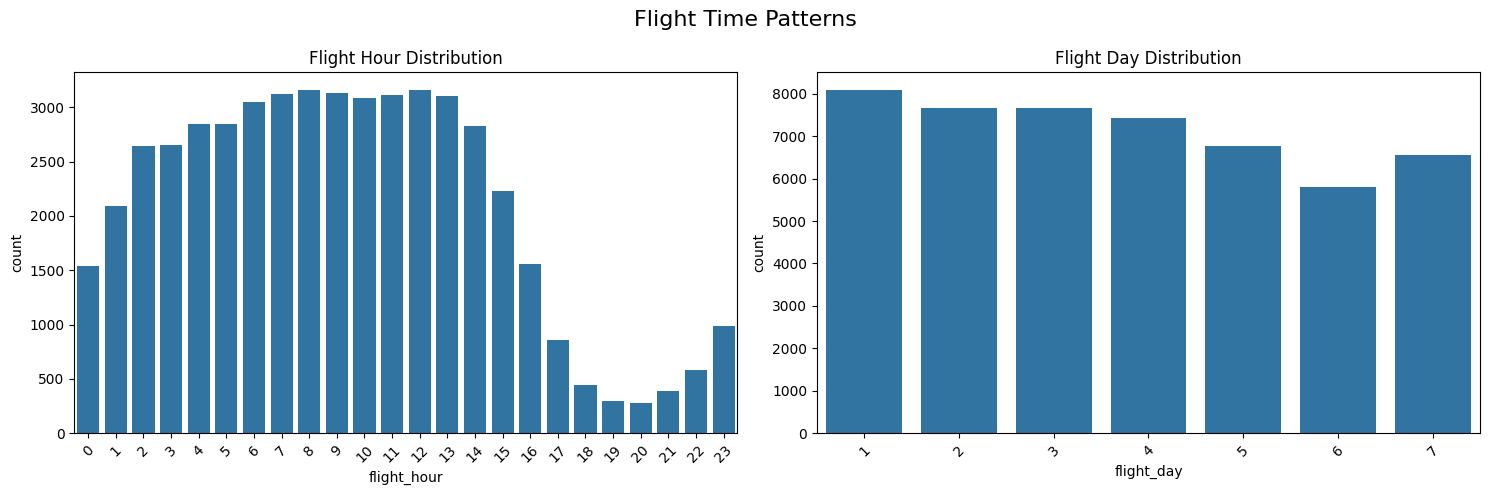

In [10]:
# distribution of flight time
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Flight Time Patterns', fontsize=16)

sns.countplot(data=df_booking, x='flight_hour', ax=axes[0])
axes[0].set_title('Flight Hour Distribution')
axes[0].tick_params(axis='x', rotation=45)

sns.countplot(data=df_booking, x='flight_day', ax=axes[1])
axes[1].set_title('Flight Day Distribution')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**Flight Hour Distribution.**
- The busiest hours are between 6am and 13pm, forming a relatively smooth peak period.
- The highest single-day peak occurs around 11-12am.
- Fewer flights between 0am and 5am
- The number of flights gradually decreases after 15:00 pm
- There is a slight increase at 23:00, probably due to the concentration of night flights at this time.

**Flight Day Distribution.**
- Early in the working week (Monday, labeled 1) has the highest number of flights.
- Tuesday through Thursday (2-4) remains relatively stable and high
- Friday and Saturday (5-6) see a gradual decline in traffic.
- Sunday (7) picks up but is lower than Monday-Thursday levels

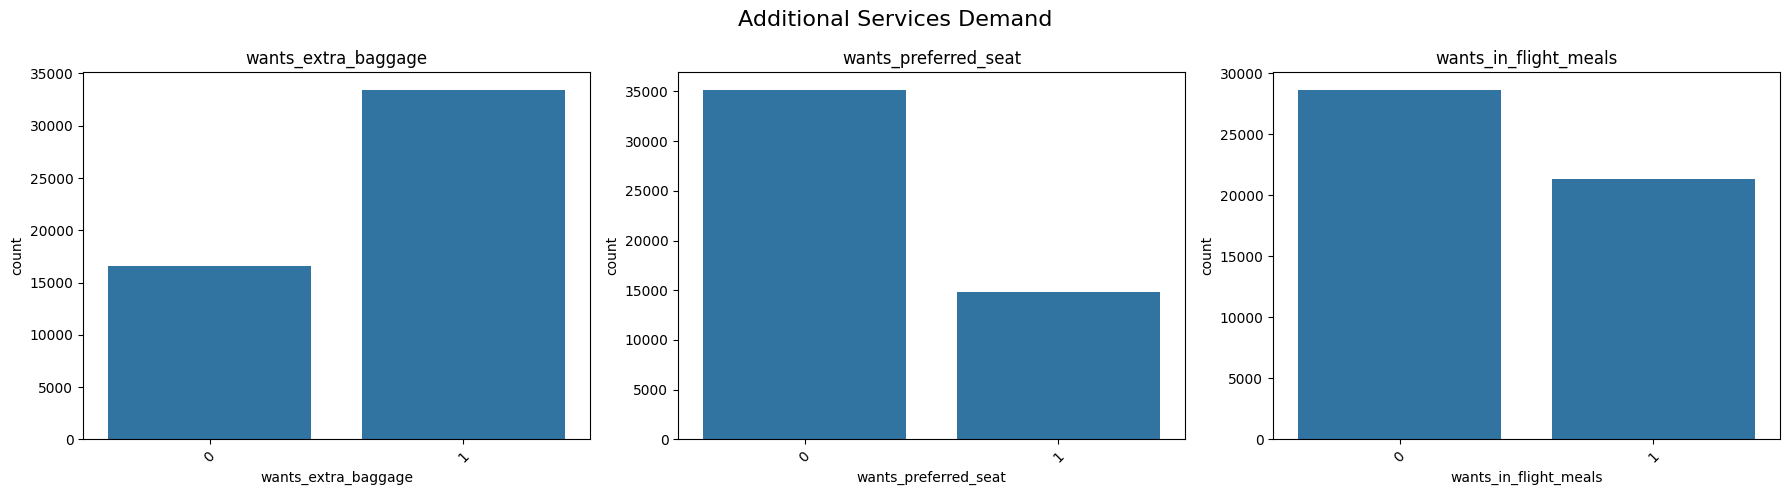

In [11]:
# Additional Services Demand
services = ['wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals']
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Additional Services Demand', fontsize=16)

for i, service in enumerate(services):
    sns.countplot(data=df_booking, x=service, ax=axes[i])
    axes[i].set_title(f'{service}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**Extra Baggage Requirements.**
- Approximately 33,000 passengers require Extra Baggage (marked 1)
- About 16,000 passengers do not need extra baggage (marked 0)
- The ratio of passengers requiring extra baggage is significantly higher, at about 2:1.

**Preferred Seat.**
- About 35,000 passengers did not need a Preferred Seat (marked 0)
- About 15,000 passengers need a preferred seat (marked 1)
- The majority of passengers preferred standard seats, with a ratio of about 7:3.

**In-flight Meals.**
- About 28,000 passengers did not require in-flight meals (marked 0)
- About 21,000 passengers require in-flight meals (marked as 1).
- The distribution of demand is relatively balanced, with a slight bias towards not requiring meals.

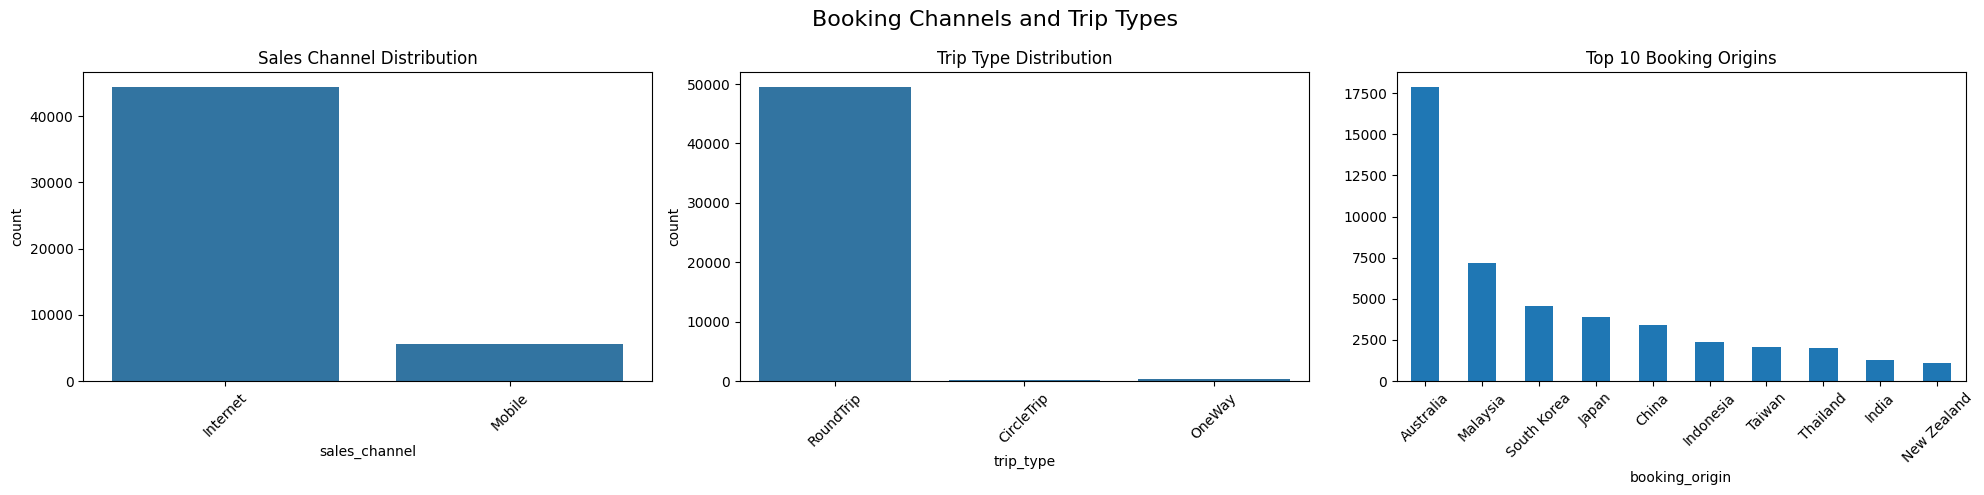

In [12]:
# Booking Channels and Trip Types
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Booking Channels and Trip Types', fontsize=16)

# sales channel
sns.countplot(data=df_booking, x='sales_channel', ax=axes[0])
axes[0].set_title('Sales Channel Distribution')
axes[0].tick_params(axis='x', rotation=45)

# type of the trip
sns.countplot(data=df_booking, x='trip_type', ax=axes[1])
axes[1].set_title('Trip Type Distribution')
axes[1].tick_params(axis='x', rotation=45)

# top 10 original country
df_booking['booking_origin'].value_counts().head(10).plot(kind='bar', ax=axes[2])
axes[2].set_title('Top 10 Booking Origins')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**Sales Channel Distribution.**
- Internet channel dominates with about 42,000 bookings
- Mobile channel has a smaller number of bookings, about 5,000 bookings
- The ratio of internet to mobile is about 8:1.

**Trip Type Distribution.**
- Roundtrip accounts for the majority of bookings, with about 50,000 bookings.
- Circuitrip and Oneway have a very small proportion of bookings
- Showing that most travelers prefer round-trip flights

**Top 10 Booking Origins.**
- Australia is the largest market with around 17,500 bookings.
- Malaysia is the second largest market with around 7,000 bookings.
- Other major markets in order: Korea, Japan, China, Indonesia, Taiwan, Thailand, India and New Zealand.
- There is a clear regional concentration, mainly from the Asia-Pacific region

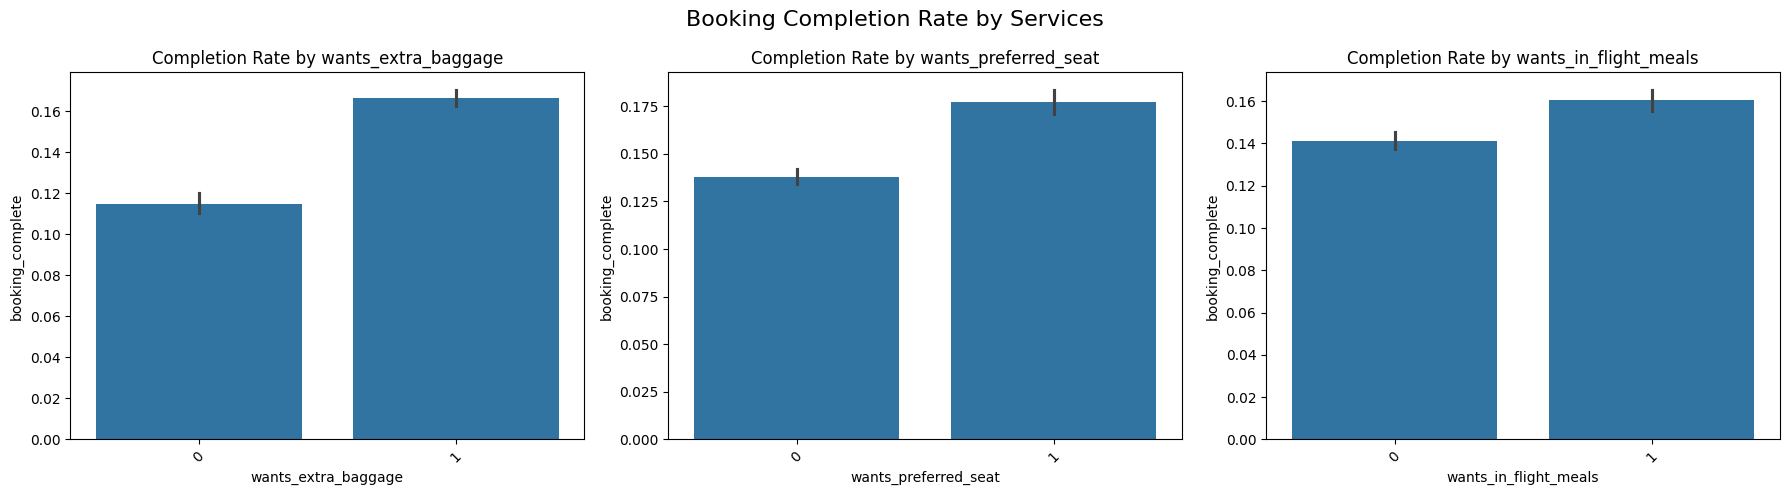

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Booking Completion Rate by Services', fontsize=16)

for i, service in enumerate(services):
    sns.barplot(data=df_booking, x=service, y='booking_complete', ax=axes[i])
    axes[i].set_title(f'Completion Rate by {service}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**Impact of Extra Baggage on Completion Rate:**
- Completion rate for travelers who opted for the extra baggage service was approximately 16.5 percent
- Completion rate for those who do not choose the extra baggage service is about 11.5%
- Difference of approximately 5 percentage points, indicating that travelers who choose extra baggage are more likely to complete their bookings

**Impact of Preferred Seating on Completion Rate:**
- Completion rate for travelers choosing preferred seating is approximately 17.5 percent
- Completion rate for travelers who do not select a preferred seat is approximately 13.5 percent
- Difference of approximately 4 percentage points, indicating that preferred seating is associated with higher booking completion rates

**The impact of in-flight meals on completion rates:**
- Completion rates for selecting an in-flight meal were approximately 16%
- Completion rates without an in-flight meal are approximately 14 percent
- The difference is about 2 percentage points, which is a relatively small impact

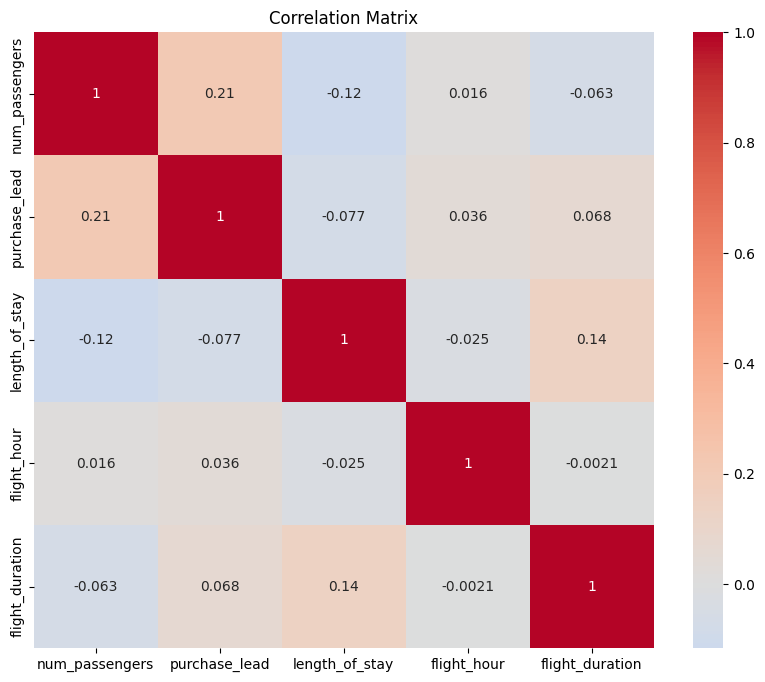

In [14]:
#Heatmap
numerical_cols = ['num_passengers', 'purchase_lead', 'length_of_stay',
                 'flight_hour', 'flight_duration']

plt.figure(figsize=(10, 8))
correlation_matrix = df_booking[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

Significant correlation:
num_passengers and purchase_lead: 0.21 (weak positive correlation)
Indicates that the higher the number of passengers, the slightly higher the booking lead time
Possibly because group travel requires more advance planning

Weak correlation:
length_of_stay and flight_duration: 0.14 (very weak positive correlation)
Destinations with longer flight durations have slightly higher length of stay.
This is logical, as long distance travelers usually stay a few days longer.
length_of_stay and num_passengers: -0.12 (very weak negative correlation)
length_of_stay decreases slightly with a larger number of passengers
Possibly because group trips are usually shorter

Largely uncorrelated relationship:
flight_hour with other characteristics (correlation coefficient close to 0)
Flight departure time seems to be a relatively independent characteristic
Not significantly influenced by other factors

Main finding:
Generally strong independence between features
The strongest correlation is only 0.21
No significant multicollinearity problems

## Modeling

In [15]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
# Data preprocessing
# Handle categorical variables
le = LabelEncoder()
categorical_columns = ['sales_channel', 'trip_type', 'route', 'booking_origin', 
                      'flight_day']
for col in categorical_columns:
    df_booking[col] = le.fit_transform(df_booking[col])

In [17]:

# Prepare features and target variable
features = ['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
            'length_of_stay', 'flight_hour', 'flight_day', 'route',
            'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
            'wants_in_flight_meals', 'flight_duration']

X = df_booking[features]
y = df_booking['booking_complete']

In [18]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Apply MinMax scaling to X variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [10, 20, 30, None],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split internal node
    'min_samples_leaf': [1, 2, 4],    # Minimum samples required at leaf node
    'max_features': ['auto', 'sqrt'],  # Number of features to consider for best split
    'bootstrap': [True, False]         # Whether to use bootstrap samples
}

In [21]:
# Create base model
rf = RandomForestClassifier(random_state=42)

In [22]:
# Create grid search object
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,                 # 5-fold cross validation
    n_jobs=-1,           # Use all available processors
    verbose=2,           # Print training progress
    scoring='accuracy'    # Scoring metric
)

In [24]:
# Perform grid search
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


d:\software\envs\ODM\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1080 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
861 fits failed with the following error:
Traceback (most recent call last):
  File "d:\software\envs\ODM\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\software\envs\ODM\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "d:\software\envs\ODM\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "d:\software\envs\ODM\Lib\site-packages\sklearn\utils\_

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [25]:
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Best Parameters: {'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Best Cross-Validation Score: 0.8525000000000003


In [26]:
# Train model with best parameters
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

d:\software\envs\ODM\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [27]:
# Evaluate final model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      8520
           1       0.00      0.00      0.00      1480

    accuracy                           0.85     10000
   macro avg       0.43      0.50      0.46     10000
weighted avg       0.73      0.85      0.78     10000



d:\software\envs\ODM\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\software\envs\ODM\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\software\envs\ODM\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


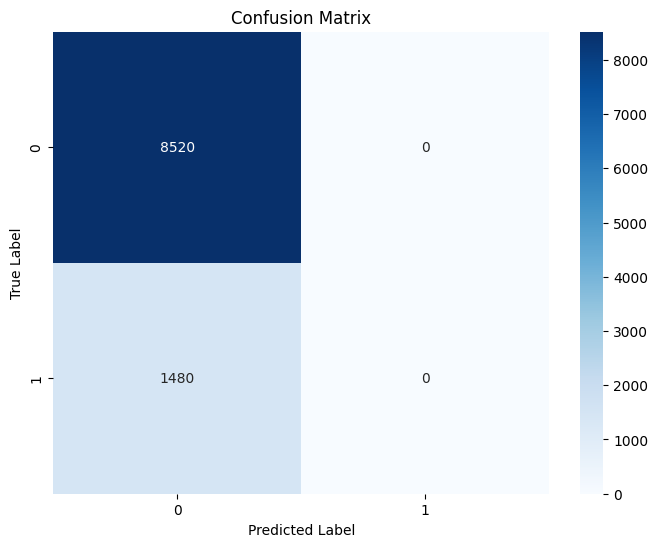

In [28]:
# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

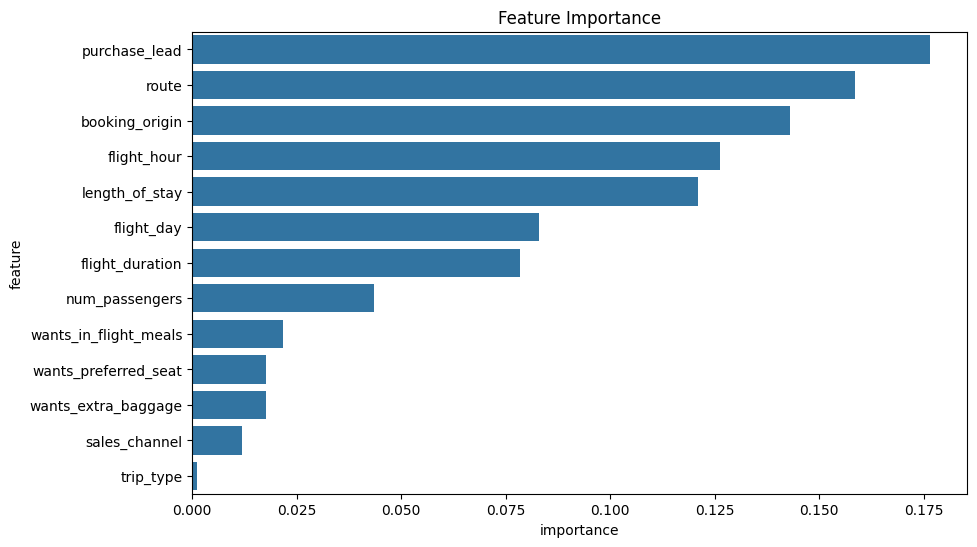

In [29]:
# Visualize feature importance
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': best_rf.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()

The feature importance analysis reveals key patterns in travel booking behavior. Advance purchase timing (purchase_lead) is the most significant predictor, followed closely by the flight route and booking origin. Time-related features, including flight hour and length of stay, also play substantial roles in the model. Interestingly, passenger preferences such as meal choices, seat selection, and extra baggage have relatively minimal impact. The least influential factor is trip type, suggesting that travel purpose has limited predictive value. This analysis could be valuable for airlines and travel companies to optimize their booking systems and marketing strategies by focusing on the most impactful features.